# Data

- $C=\{1,2,3,4,5,6,7,8\}$ $\leftarrow$ set of cities to visit.

- $n = 8$ $\leftarrow$ number of cities.

- $T = (1,2,3,4,5,6,7,8)$ $\leftarrow$ current tour.

In [1]:
tour = [1, 2, 3, 4, 5, 6, 7, 8, 1]

 - Coordinates of each city:

In [2]:
coords = (
    # x   y    city
    (86, 37), # 1
    (17, 94), # 2
    ( 3, 65), # 3
    (48, 43), # 4
    (78, 70), # 5
    (17, 55), # 6
    (62, 91), # 7
    (78, 91)  # 8
)

- $D=(d_{ij})$, $i,j \in C$ $\leftarrow$ matrix of distances between cities.

In [3]:
import math
distances = [
    [
        int(math.hypot(abs(coords[i][0] - coords[j][0]), abs(coords[i][1] - coords[j][1])))
        if i != j else 0
        for j in range(len(coords))
    ]
    for i in range(len(coords))
]
distances

[[0, 89, 87, 38, 33, 71, 59, 54],
 [89, 0, 32, 59, 65, 39, 45, 61],
 [87, 32, 0, 50, 75, 17, 64, 79],
 [38, 59, 50, 0, 40, 33, 50, 56],
 [33, 65, 75, 40, 0, 62, 26, 21],
 [71, 39, 17, 33, 62, 0, 57, 70],
 [59, 45, 64, 50, 26, 57, 0, 16],
 [54, 61, 79, 56, 21, 70, 16, 0]]

# Objective

The objective is to get a tour $T$ that visits all cities in $C$, ending with the first city, such that the total distance of the tour is as minimal as possible.

$$
\begin{aligned}
& \underset{t \in T}{\text{min}}
& & \sum_{i=1}^{n} d_{t_i t_{i+1}}
\end{aligned}
$$

We already have a feasible solution, our current tour $T$, so we are going to use the *2-opt* heuristic to try to improve the tour according to the objective function, that is, to reduce the total distance.

# Plotting

In order to illustrate each change to the tour, we will declare a function to make the corresponding plot for every iteration:

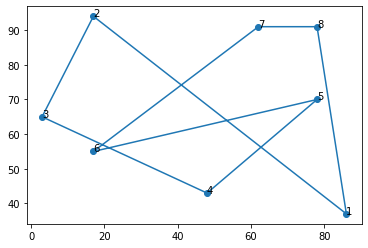

In [4]:
import matplotlib.pyplot as plt
def plot_tour():
    '''Plots the tour.'''
    x_coords = [c[0] for c in coords]
    y_coords = [c[1] for c in coords]
    plt.scatter(x_coords, y_coords)
    for city, tag in enumerate(i+1 for i in range(8)):
        plt.annotate(tag, (x_coords[city], y_coords[city]))
    global tour
    sorted_coords = [coords[k] for k in (t - 1 for t in tour)]
    x_values = [c[0] for c in sorted_coords]
    y_values = [c[1] for c in sorted_coords]
    plt.plot(x_values, y_values)
    plt.show()

%matplotlib inline
plot_tour()

# 2-opt

The *2-opt* algorithm is a local search heuristic that consist in selecting 2 edges and swapping their nodes. If the resulting tour has a lower cost, then it becomes the current solution. This is repeated until no improvement has been reached.